# Hypothesis Test Example

## A few definitions
- Hypothesis - A premise or claim we want to test
- Null Hypothesis $H_0$ - Currently accepted value for a parameter
- Alternative Hypothesis $H_a$ - The claim we want to test
- $H_0$ and $H_a$ are mathematical opposites

## The example
Recently I bought a chocolate bar machine. The manufacturer claims that the machine is set up to produce chocolate bars that weigh at maximal 5g on average. But I have the feeling that the bars are heavier on average.

- Null Hypothesis $H_0: \mu \leq 5g$
- Alternative Hypothesis $H_a: \mu > 5g$

Now I have collected a lot of data and want to test my hypothesis!

## How do we do the test?
- We calculate the p-value $p$ - probability to get bars with maximal the weight as in our data under the assumption that the $H_0$ is true.
    - If $p \leq \alpha \rightarrow$ we reject $H_0$
    - If $p > \alpha \rightarrow$ we fail to reject $H_0$
- Level of confidence $C=0.95$ - How confident are we in our decision
- Level of significance $\alpha = 1-C = 0.05$

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# for the empirical cdf
from statsmodels.distributions.empirical_distribution import ECDF
# for the interpolation
from scipy.interpolate import pchip

uni_color = '#004b5a'

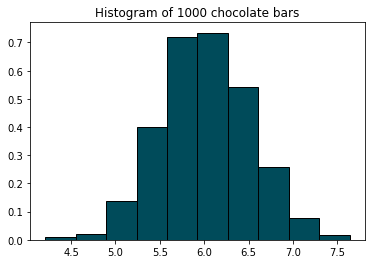

In [2]:
# collect chocolate data
h0_mu = 5
all_measurements = np.random.normal(6, 0.5, 1000)
plt.hist(all_measurements, color=uni_color, edgecolor='black', density=True,
         bins=10)
plt.title('Histogram of 1000 chocolate bars')
plt.show()
#plt.savefig('figure30.pdf', bbox_inches='tight')

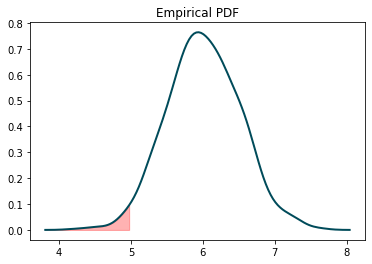

In [3]:
# empirical pdf
ax = plt.axes()
sns.distplot(all_measurements, hist=False, kde=True,
               kde_kws={'linewidth': 2, 'shade': False},
               color=uni_color, ax=ax)
ax.set_title('Empirical PDF')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1[x1<=h0_mu],y1[x1<=h0_mu], color="red", alpha=0.3)
plt.show()
#plt.savefig('figure31.pdf', bbox_inches='tight')

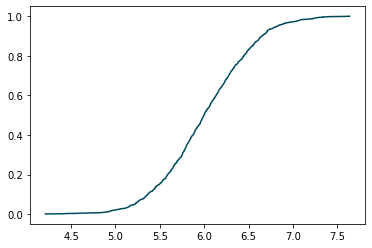

In [4]:
# empirical cdf
ecdf = ECDF(all_measurements)
plt.plot(ecdf.x, ecdf.y, color=uni_color)
plt.show()

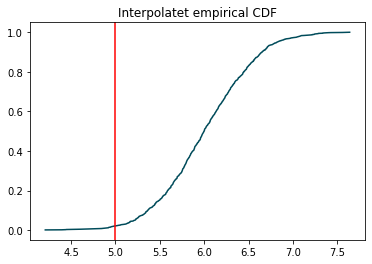

p-value:  0.020806326955685177


In [5]:
# shape preserving piecewise cubic interpolation of empirical pdf
interpolation = pchip(ecdf.x[1:],ecdf.y[1:])
max_x = np.max(ecdf.x[1:])
min_x = np.min(ecdf.x[1:])
x = np.linspace(min_x,max_x,10000)
y = interpolation(x)
plt.plot(x, y, color=uni_color)
plt.axvline(h0_mu, 0, 1, color='red')
plt.title('Interpolatet empirical CDF')
#plt.fill_between(x[x<6], 0, interpolation(x[x<6]))
plt.show()
#plt.savefig('figure32.pdf', bbox_inches='tight')
print('p-value: ', interpolation(h0_mu)) # we reject h_0